<a href="https://colab.research.google.com/github/NyafeuKamdem/loan_prediction_ml/blob/main/XGBoost_demand_forecast_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Week2**

In [1]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.8/344.8 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.0/688.0 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 13.3 MB/s eta 0:00:00


In [3]:
!pip install pyngrok --quiet

###**Import packages**

In [4]:
# Importing the needed packages.
import numpy as np                                                # For numerical operation arraywise.
import pandas as pd                                               # For Data manipulation.
import matplotlib.pyplot as plt                                   # For basic visualization's functions.
import seaborn as sns                                             # For advance visualization's functions.
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

from darts import TimeSeries
from darts.models import ARIMA
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

import mlflow
from mlflow.tracking import MlflowClient # Import the client for more control
import joblib
import pickle
import mlflow.xgboost
from pyngrok import ngrok, conf
import getpass
import subprocess
import os
import time

Mounted at /content/drive


In [5]:
!pwd  # pwd = 'print working directory' tels us where we are

/content


In [6]:
%cd drive/MyDrive/ # cd = 'change directory'

[Errno 2] No such file or directory: 'drive/MyDrive/ # cd = change directory'
/content


In [7]:
!pwd

/content


###**Data Loading for Guayas Region**

In [8]:
df = pd.read_csv('/content/drive/MyDrive/guayas_ready.csv', index_col=0) # index_col=0 let pandas know that the df has an index

In [9]:
#df_item = pd.read_csv('/content/drive/MyDrive/item.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22285217 entries, 0 to 0
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   id              int64  
 2   store_nbr       int64  
 3   item_nbr        int64  
 4   unit_sales      float64
 5   onpromotion     bool   
 6   z_score         float64
 7   unit_sales_log  float64
 8   year            int64  
 9   month           int64  
 10  day             int64  
 11  day_of_week     int64  
dtypes: bool(1), float64(3), int64(7), object(1)
memory usage: 2.0+ GB


In [11]:
onpromotion_onpromotion_corr =  df['onpromotion'].astype(int).corr(df['unit_sales'])
onpromotion_onpromotion_corr # if onpromotion_onpromotion_corr is closed to 0 --> onpromotion_rolling_averages probably won’t help.

np.float64(0.1364494834171825)

In [12]:
df.shape

(22285217, 12)

In [13]:
df.head(1)

,date,id,store_nbr,item_nbr,unit_sales,onpromotion,z_score,unit_sales_log,year,month,day,day_of_week
0,2013-02-17,1895433,24,96995,1.0,False,-0.728178,0.693147,2013,2,17,6


In [14]:
# Filtering the dataset for the perioid of Jan 1 – Mar 31 2014
min_date = '2013-11-30'
max_date = '2014-04-01'
df = df[(df['date'] > min_date) & (df['date'] < max_date)]
df.shape

(1266514, 12)

###**EDA**

####**Handling Missing data**

In [15]:
df.isna().sum()

,0
date,0
id,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,0
z_score,1
unit_sales_log,0
year,0
month,0


In [16]:
df = df.dropna(subset=['z_score'])

In [17]:
df.isna().sum()

,0
date,0
id,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,0
z_score,0
unit_sales_log,0
year,0
month,0


####**Feature Engineering for Machine Learning**

In [18]:
df.head(1)

,date,id,store_nbr,item_nbr,unit_sales,onpromotion,z_score,unit_sales_log,year,month,day,day_of_week
287,2013-12-01,0,24,96995,0.0,False,0.0,0.0,2013,12,1,6


In [19]:
df=df.reset_index()

In [20]:
df.head(1)

,index,date,id,store_nbr,item_nbr,unit_sales,onpromotion,z_score,unit_sales_log,year,month,day,day_of_week
0,287,2013-12-01,0,24,96995,0.0,False,0.0,0.0,2013,12,1,6


In [21]:
df_features = df.copy()
df_features['date'] = pd.to_datetime(df_features['date'])
df_features = df_features.set_index(['date', 'store_nbr', 'item_nbr']).sort_index()

In [22]:
# --- Step 1: Data Preparation and Feature Engineering on the full DataFrame ---

# Assume your initial DataFrame is named 'df'
# Convert 'date' to datetime and set a multi-index for proper group-wise operations
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date', 'store_nbr', 'item_nbr']).sort_index()

# Create a copy to avoid a pandas warning
df_features = df.copy()

# 1. Lag features (previous day, week, month)
df_features['lag_1'] = df_features.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1)
df_features['lag_7'] = df_features.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(7)
df_features['lag_30'] = df_features.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(30)

# 2. Rolling statistics (past 7 and 30 days)
# Use .shift(1) before the rolling window to prevent data leakage
df_features['rolling_mean_7'] = df_features.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).rolling(window=7).mean()
df_features['rolling_std_7'] = df_features.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).rolling(window=7).std()
df_features['rolling_mean_30'] = df_features.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).rolling(window=30).mean()
df_features['rolling_std_30'] = df_features.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).rolling(window=30).std()

# 3. Calendar/date features
# Use .get_level_values() to access the date information from the multi-index.
# Use .values where necessary to avoid re-indexing issues.
date_index = df_features.index.get_level_values('date')

df_features['day'] = date_index.day
df_features['day_of_week'] = date_index.dayofweek
df_features['is_weekend'] = (df_features['day_of_week'] >= 5).astype(int)
df_features['week_of_year'] = date_index.isocalendar().week.values.astype(int)
df_features['month'] = date_index.month
df_features['is_month_start'] = date_index.is_month_start.astype(int)
df_features['days_from_mid'] = (df_features['day'] - 15).abs()
df_features['is_month_end'] = date_index.is_month_end.astype(int)

# 4. Drop all rows with NaN values created by lags and rolling windows
# This will remove the first 30 days for each store-item combination.
df_clean = df_features.dropna()

# At this point, `df_clean` is our final DataFrame with all engineered features.
# It is still multi-indexed.

# Display the first few rows and columns to verify
print("Final DataFrame with Engineered Features:")
print(df_clean.head())
print("\nDataFrame Info:")
df_clean.info()

Final DataFrame with Engineered Features:
                               index  id  unit_sales  onpromotion  z_score  \
date       store_nbr item_nbr                                                
2013-12-31 24        96995       317   0         0.0        False      0.0   
                     103520      359   0         0.0        False      0.0   
                     105574      354   0         0.0        False      0.0   
                     105575      340   0         0.0        False      0.0   
                     105577      362   0         0.0        False      0.0   

                               unit_sales_log  year  month  day  day_of_week  \
date       store_nbr item_nbr                                                  
2013-12-31 24        96995                0.0  2013     12   31            1   
                     103520               0.0  2013     12   31            1   
                     105574               0.0  2013     12   31            1   
           

In [23]:
df_clean.head()

index  id  unit_sales  onpromotion  z_score  \
date       store_nbr item_nbr                                                
2013-12-31 24        96995       317   0         0.0        False      0.0   
                     103520      359   0         0.0        False      0.0   
                     105574      354   0         0.0        False      0.0   
                     105575      340   0         0.0        False      0.0   
                     105577      362   0         0.0        False      0.0   

                               unit_sales_log  year  month  day  day_of_week  \
date       store_nbr item_nbr                                                  
2013-12-31 24        96995                0.0  2013     12   31            1   
                     103520               0.0  2013     12   31            1   
                     105574               0.0  2013     12   31            1   
                     105575               0.0  2013     12   31            1   
                     105577               0.0  2013     12   31            1   

                               ...  lag_30  rolling_mean_7  rolling_std_7  \
date       store_nbr item_nbr  ...                                          
2013-12-31 24        96995     ...     0.0             0.0            0.0   
                     103520    ...     0.0             0.0            0.0   
                     105574    ...     0.0             0.0            0.0   
                     105575    ...     0.0             0.0            0.0   
                     105577    ...     0.0             0.0            0.0   

                               rolling_mean_30  rolling_std_30  is_weekend  \
date       store_nbr item_nbr                                                
2013-12-31 24        96995            0.300000        1.055364           0   
                     103520           0.300000        1.055364           0   
                     105574           0.300000        1.055364           0   
                     105575           0.300000        1.055364           0   
                     105577           0.266667        1.048261           0   

                               week_of_year  is_month_start  days_from_mid  \
date       store_nbr item_nbr                                                
2013-12-31 24        96995                1               0             16   
                     103520               1               0             16   
                     105574               1               0             16   
                     105575               1               0             16   
                     105577               1               0             16   

                               is_month_end  
date       store_nbr item_nbr                
2013-12-31 24        96995                1  
                     103520               1  
                     105574               1  
                     105575               1  
                     105577               1  

[5 rows x 22 columns]

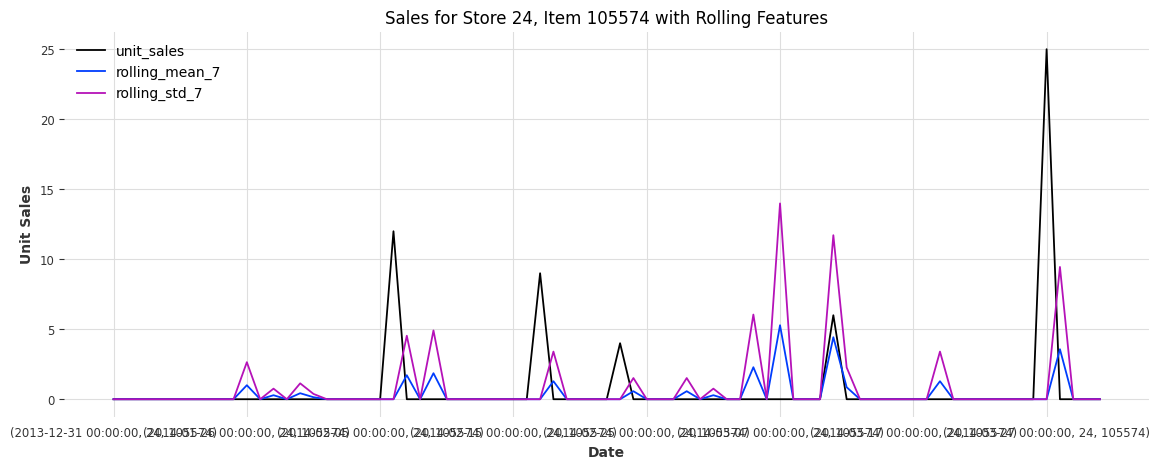

In [24]:
# First, select a specific store and item to visualize.
store_id = 24
item_id = 105574

# Use .loc to select the data for this specific store-item combination.
# The index will automatically be the 'date' level, which is perfect for plotting.
try:
    single_series_df = df_clean.loc[(slice(None), store_id, item_id), :]

    # Now, you can use the same plotting code on this smaller DataFrame
    plt.figure(figsize=(14, 5))
    single_series_df[['unit_sales', 'rolling_mean_7', 'rolling_std_7']].plot(ax=plt.gca())

    plt.title(f'Sales for Store {store_id}, Item {item_id} with Rolling Features')
    plt.xlabel('Date')
    plt.ylabel('Unit Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

except KeyError:
    print(f"No data found for Store {store_id}, Item {item_id}. Please select a different combination.")

###**Model**

####**Data Splitting**

In [25]:
df_clean['onpromotion'] = df_clean['onpromotion'].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 920398 entries, (Timestamp('2013-12-31 00:00:00'), np.int64(24), np.int64(96995)) to (Timestamp('2014-03-31 00:00:00'), np.int64(51), np.int64(1466049))
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            920398 non-null  int64  
 1   id               920398 non-null  int64  
 2   unit_sales       920398 non-null  float64
 3   onpromotion      920398 non-null  int64  
 4   z_score          920398 non-null  float64
 5   unit_sales_log   920398 non-null  float64
 6   year             920398 non-null  int64  
 7   month            920398 non-null  int32  
 8   day              920398 non-null  int32  
 9   day_of_week      920398 non-null  int32  
 10  lag_1            920398 non-null  float64
 11  lag_7            920398 non-null  float64
 12  lag_30           920398 non-null  float64
 13  rolling_mean_7   920398 non-null  float64
 14  rolling

/tmp/ipython-input-4262303530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['onpromotion'] = df_clean['onpromotion'].astype(int)


In [26]:
# Define a min and cutoff date for training vs. testing
min_date = '2014-01-01'
cutoff_date = '2014-03-01'

# Split the DataFrame chronologically.
train = df_clean.loc[(df_clean.index.get_level_values('date') >= min_date) & (df_clean.index.get_level_values('date') < cutoff_date)]
test  = df_clean.loc[df_clean.index.get_level_values('date') >= cutoff_date]

# Convert the multi-index levels (date, store_nbr, item_nbr) into regular columns.
train_df = train.reset_index()
test_df = test.reset_index()

# Define the target variable
y_train = train_df['unit_sales']
y_test  = test_df['unit_sales']

# Define the features.
# 'unit_sales' is the target and 'date' is not used as a direct feature
# for a supervised learning model like XGBoost.
feature_cols = [col for col in train_df.columns if col not in ['unit_sales', 'date', 'id', 'z_score', 'unit_sales_log', 'year', 'month', 'day', 'day_of_week']]

X_train = train_df[feature_cols]
X_test  = test_df[feature_cols]

# Print the final shapes and columns to confirm everything is correct
print("Training rows:", len(train_df))
print("Testing rows:", len(test_df))
print("\nTraining Features (X_train) columns:", X_train.columns.tolist())
print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Training rows: 581663
Testing rows: 329348

Training Features (X_train) columns: ['store_nbr', 'item_nbr', 'index', 'onpromotion', 'lag_1', 'lag_7', 'lag_30', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_30', 'rolling_std_30', 'is_weekend', 'week_of_year', 'is_month_start', 'days_from_mid', 'is_month_end']

X_train shape: (581663, 16)
y_train shape: (581663,)
X_test shape: (329348, 16)
y_test shape: (329348,)


####**Implementing XGBoost for Time-Series Forecasting**

**Plotting Actual vs Predicted Values and Metrics**

#####**Basic Model**

In [27]:
# Initialize XGBoost regressor
baseline_xgb = xgb.XGBRegressor(random_state=42)

In [28]:
# Train the XGBoost model
baseline_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_xgb.predict(X_test)

In [29]:
# We'll need the original test_df to get the date and store/item information
# Remember, test_df was created by calling test.reset_index()

def plot_single_series_forecast(store_id, item_id, model, name='model'):
    """
    Plots the actual vs. predicted sales for a single store-item combination.

    """
    # Create a boolean mask to filter the test_df for the specific series
    mask = (test_df['store_nbr'] == store_id) & (test_df['item_nbr'] == item_id)

    # Filter the actual values (y_test)
    y_test_series = y_test[mask]

    # Generate predictions for the entire test set (if not already done)
    y_pred_all = model.predict(X_test)

    # Filter the predicted values for the specific series
    y_pred_series = y_pred_all[mask.values]

    # Get the corresponding dates for the x-axis
    dates = test_df[mask]['date']

    if dates.empty:
        print(f"No data found for Store {store_id}, Item {item_id} in the test set.")
        return

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(dates, y_test_series.values, label='Actual Sales')
    plt.plot(dates, y_pred_series, label=f'Predicted Sales by {name}', color='red')

    plt.title(f'Actual vs Predicted Sales for Store {store_id}, Item {item_id}')
    plt.xlabel('Date')
    plt.ylabel('Unit Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


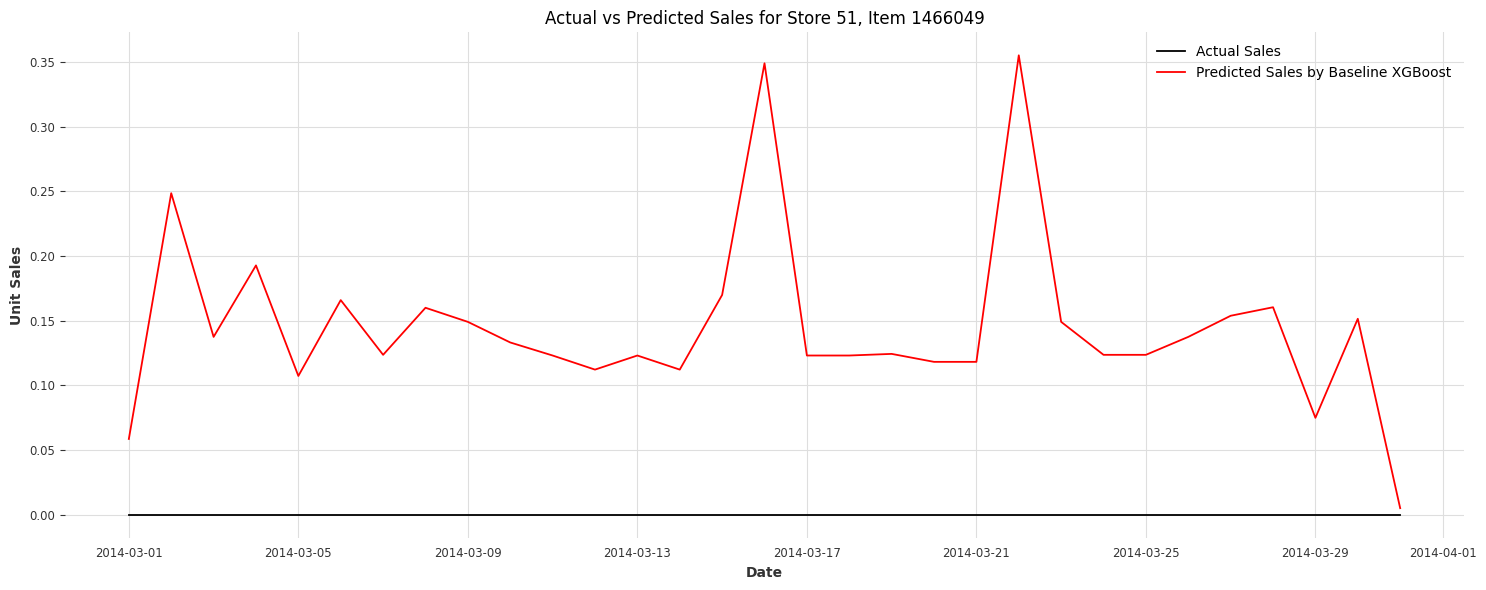

In [30]:
store_id = 51
item_id = 1466049

# Call the new plotting function
plot_single_series_forecast(store_id, item_id, baseline_xgb, name='Baseline XGBoost')

In [31]:
# Model Evaluation

def forecast_metrics(y_true, y_pred):
    """
    Compute a common set of forecast-error statistics.

    Parameters
    ----------
    y_true : 1-D array-like
        Actual (ground-truth) values.
    y_pred : 1-D array-like
        Forecasted values.

    Returns
    -------
    dict
        Keys: 'MAE', 'Bias', 'MAD', 'rMAD', 'MAPE', 'RMSE'
    """
    y_true = np.asarray(y_true, dtype=float).flatten()
    y_pred = np.asarray(y_pred, dtype=float).flatten()

    # basic errors
    errors       = y_true - y_pred
    abs_errors   = np.abs(errors)
    pct_errors   = abs_errors / np.where(y_true == 0, np.nan, y_true)   # avoid ÷0

    # core statistics
    mae   = abs_errors.mean()
    bias  = errors.mean()
    rmse  = np.sqrt((errors ** 2).mean())

    # MAD of the ACTUAL series (dispersion of demand itself)
    mad   = np.abs(y_true - y_true.mean()).mean()

    # Relative MAD = MAE divided by MAD  (how big the forecast error is vs. “typical” variation)
    rmad  = mae / mad if mad else np.nan

    # Mean Absolute Percentage Error
    mape  = np.nanmean(pct_errors) * 100   # expressed in %

    return {
        "MAE" : mae,
        "Bias": bias,
        "MAD" : mad,
        "rMAD": rmad,
        "MAPE": mape,
        "RMSE": rmse
    }


In [32]:
# Compute the forecast metrics using your function
baseline_metrics = forecast_metrics(y_true=y_test, y_pred=y_pred)

# Print the results in a readable format
print("Baseline Model Forecast Metrics:")
for metric, value in baseline_metrics.items():
    print(f"{metric}: {value:.4f}")

Baseline Model Forecast Metrics:
MAE: 0.8262
Bias: -0.0084
MAD: 0.8067
rMAD: 1.0242
MAPE: 86.7754
RMSE: 3.7746


#**Week3**

#####**Hypertuned Model**

In [33]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200],       # Number of boosting rounds (trees)
    'max_depth': [3, 4],                    # Maximum depth of each tree
    'learning_rate': [0.01, 0.1],     # Step size shrinkage for each boosting step
    'subsample': [0.8, 1.0],               # Fraction of samples used per tree
    'colsample_bytree': [0.5, 0.8]    # Fraction of features used per tree
}

tscv = TimeSeriesSplit(n_splits=3)  # split chronologically

# Initialize GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(
    estimator=baseline_xgb,           # The XGBoost model to tune
    param_grid=param_grid,            # The hyperparameter grid defined above
    cv=tscv,                          # use TimeSeriesSplit(instead of standard CV) ensures that past data is used to predict future data, like in real forecasting.
    scoring='neg_mean_absolute_error',# Use negative MAE as scoring (GridSearch maximizes score)
    verbose=1                         # Print progress
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Print the best hyperparameters found
print("Best params:", grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [33]:
# Initialize XGBoost regressor
'''
hypertuned_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    colsample_bytree=best_params["colsample_bytree"],
    random_state=42
)
'''
hypertuned_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)

In [34]:
# Train the XGBoost model
hypertuned_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = hypertuned_xgb.predict(X_test)

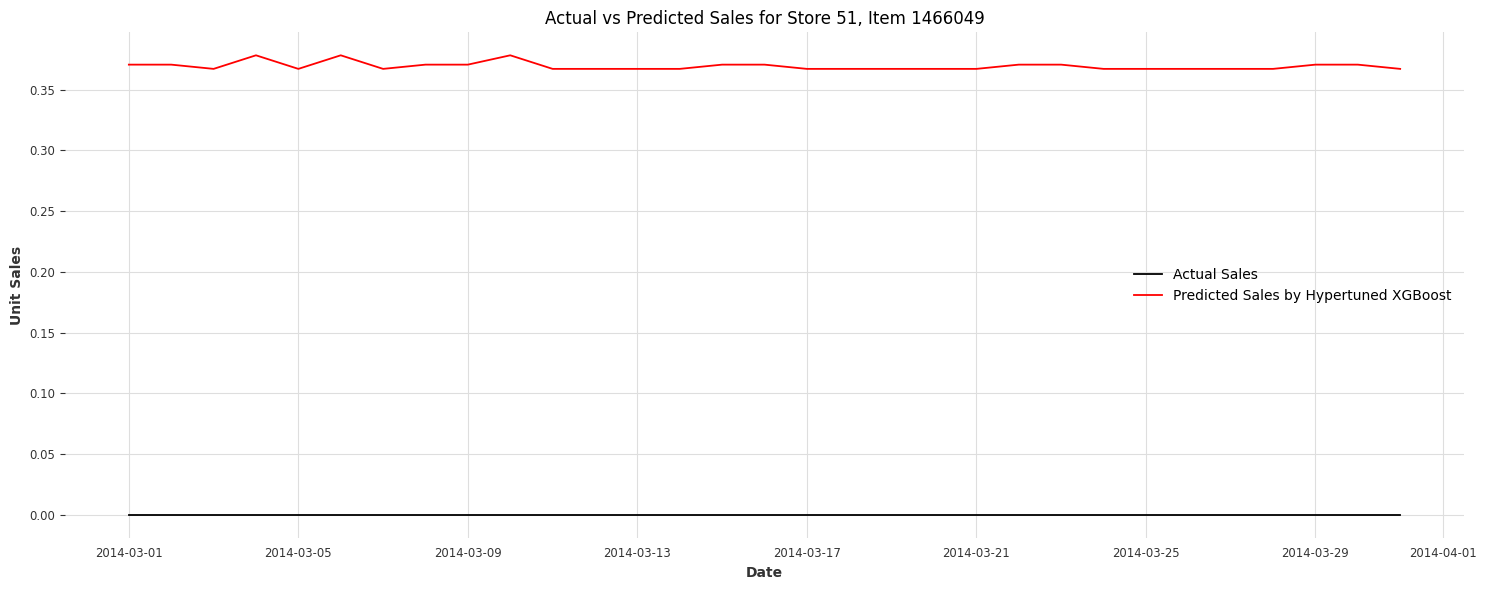

In [35]:
store_id = 51
item_id = 1466049

# Call the new plotting function
plot_single_series_forecast(store_id, item_id, hypertuned_xgb, name='Hypertuned XGBoost')

In [36]:
# Print the results in a readable format
tuned_metrics = forecast_metrics(y_test, y_pred_tuned)
for k, v in tuned_metrics.items():
    print(f"{k}: {v:,.2f}")

MAE: 0.76
Bias: 0.05
MAD: 0.81
rMAD: 0.94
MAPE: 85.24
RMSE: 3.65


####**MLflow**

In [37]:
# Mount Google Drive to save results
drive.mount('/content/drive')

# Define the MLflow storage path in Google Drive
mlflow_storage_path = "/content/drive/MyDrive/mlflow_results"

# Set MLflow to log to the Google Drive directory
mlflow.set_tracking_uri(f"file:{mlflow_storage_path}")

# Set the experiment name *before* starting any runs.
# This ensures both models are logged to the same experiment.
# We will create it if it doesn't already exist.
experiment_name = "baseline_xgb_vs_hypertuned_xgb"
mlflow.set_experiment(experiment_name)

print(f"MLflow is now set to use the experiment: '{experiment_name}'")
# Get and print the details of the active experiment to confirm
experiment_details = mlflow.get_experiment_by_name(experiment_name)
if experiment_details:
    print(f"Experiment ID: {experiment_details.experiment_id}")
    print(f"Artifact location: {experiment_details.artifact_location}")
else:
    print("Warning: Could not find the newly set experiment.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/mlflow/store/tracking/file_store.py", line 366, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/mlflow/store/tracking/file_store.py", line 464, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/mlflow/store/tracking/file_store.py", line 1634, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/mlflow/store/tracking/file_store.py", line 1627, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

MLflow is now set to use the experiment: 'baseline_xgb_vs_hypertuned_xgb'
Experiment ID: 757717366182502457
Artifact location: file:///content/drive/My Drive/mlflow_results/757717366182502457


<Figure size 640x480 with 0 Axes>

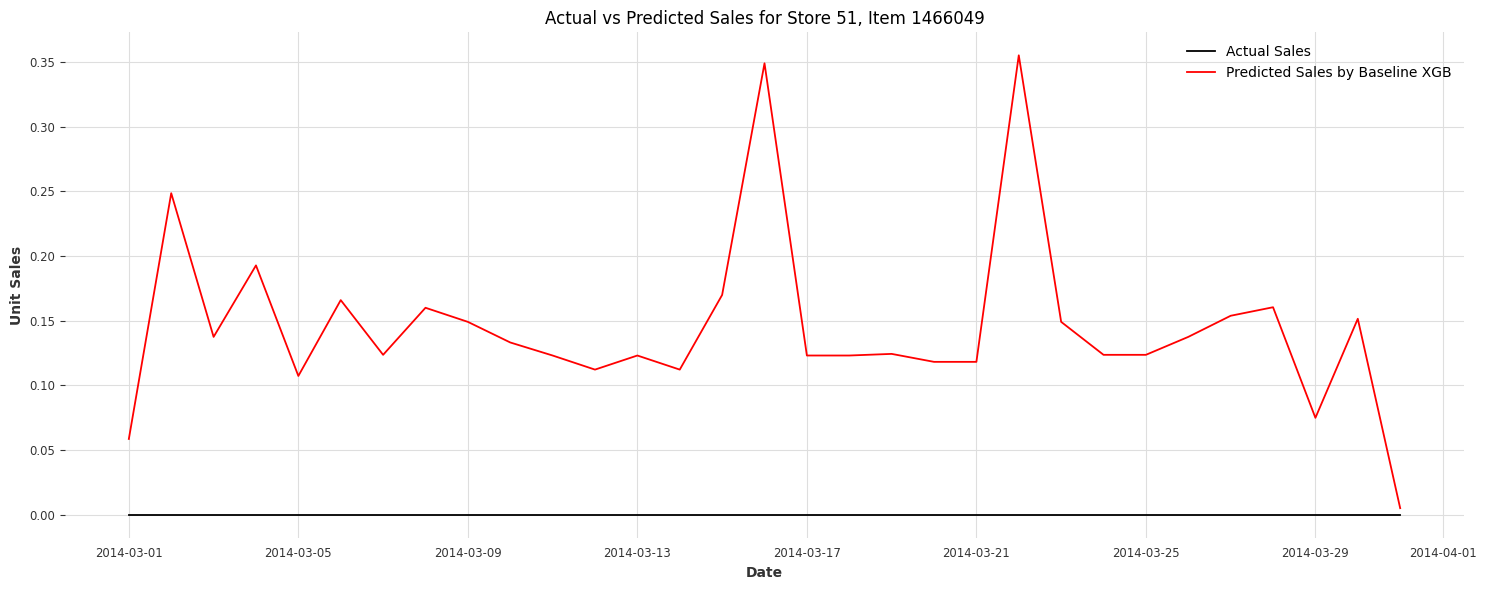

2025/08/20 09:12:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1028: UserWarning: [09:12:02] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/08/20 09:12:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [38]:
# Save the plot for the baseline model to a file
plot_filename_baseline = "forecast_plot_baseline.png"
# This line displays the plot, and the next line saves it.
# plot_single_series_forecast(51, 1466049, baseline_xgb, name='Baseline XGB')
# plt.savefig(plot_filename_baseline)
# Get hyperparameters from the baseline model
baseline_params = baseline_xgb.get_params()

# Save the plot to a file
#plot_filename = "forecast_plot_baseline.png"
'''
plot_single_series_forecast(51, 1466049, baseline_xgb, name='Baseline XGB')  # display the plot
plt.savefig("forecast_plot_baseline.png")  # save it to disk
'''
fig = plt.figure()
plot_single_series_forecast(51, 1466049, baseline_xgb, name="Baseline XGB")

# Start MLflow run for the baseline model
with mlflow.start_run(run_name="XGBoost_Baseline"):

    # 1. Log hyperparameters
    #mlflow.log_params(baseline_params)
    for k, v in baseline_metrics.items():
        mlflow.log_metric(k, float(v))


    # 2. Log metrics
    mlflow.log_metrics(baseline_metrics)

    # 3. Log forecast plot as artifact
    '''
    mlflow.log_artifact("forecast_plot_baseline.png", artifact_path="plots")
    '''
    mlflow.log_figure(fig, "forecast_plot.png")

    # 4. Log the model itself
    mlflow.xgboost.log_model(baseline_xgb, "xgboost-model-baseline")

# The run ends automatically here


**log the secon run**

<Figure size 640x480 with 0 Axes>

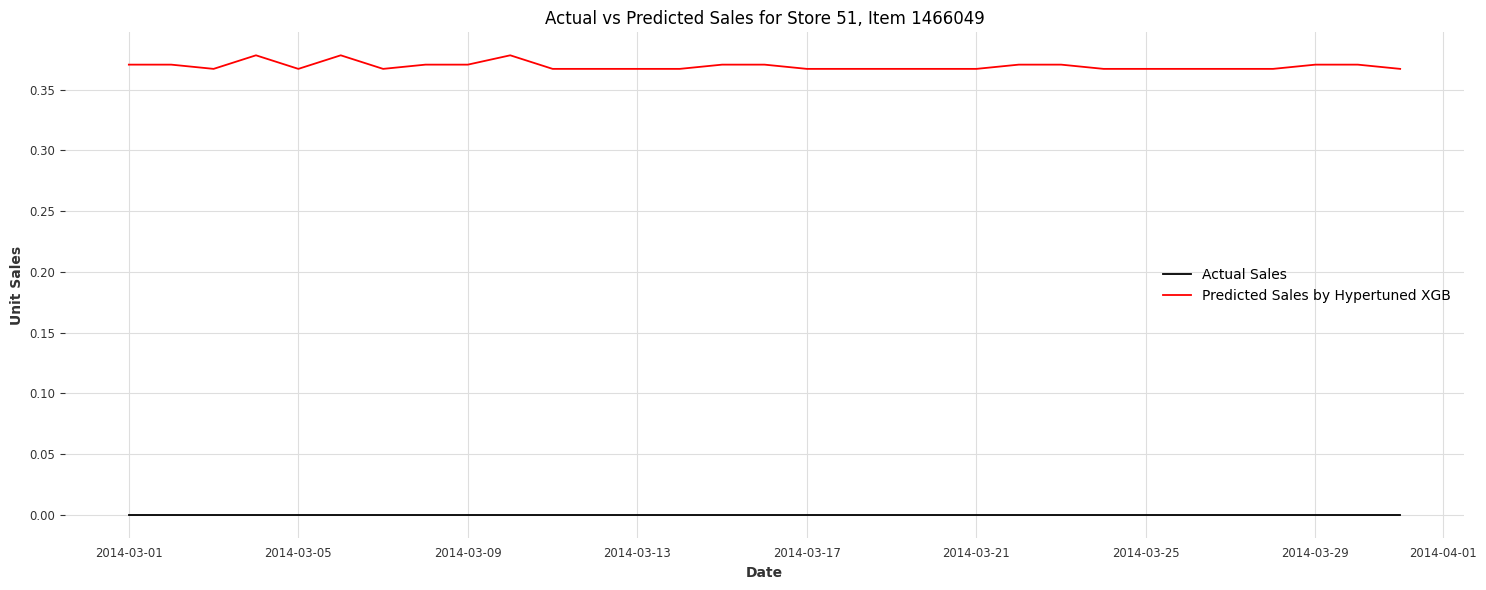

2025/08/20 09:12:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1028: UserWarning: [09:12:28] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/08/20 09:12:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [39]:
# Get the hyperparameters from the tuned model
tuned_params = hypertuned_xgb.get_params()

# Save the plot for the tuned model to a file
plot_filename_tuned = "forecast_plot_tuned.png"
# This line displays the plot, and the next line saves it.
# plot_single_series_forecast(51, 1466049, hypertuned_xgb, name='Hypertuned XGB')
# plt.savefig(plot_filename_tuned)

# Get the hyperparameters from the tuned model
tuned_params = hypertuned_xgb.get_params()

# Save the plot to a file
#plot_filename = "forecast_plot_tuned.png"
'''
plot_single_series_forecast(51, 1466049, hypertuned_xgb, name='Hypertuned XGB')  # display the plot
plt.savefig("forecast_plot_tuned.png")  # save it to disk
'''
fig = plt.figure()
plot_single_series_forecast(51, 1466049, hypertuned_xgb, name="Hypertuned XGB")

# Start MLflow run for the tuned model
with mlflow.start_run(run_name="XGBoost_Tuned"):

    # 1. Log hyperparameters
    mlflow.log_params(tuned_params)

    # 2. Log metrics
    #mlflow.log_metrics(tuned_metrics)
    for k, v in tuned_metrics.items():
        mlflow.log_metric(k, float(v))


    # 3. Log forecast plot as artifact
    '''
    mlflow.log_artifact("forecast_plot_tuned.png", artifact_path="plots")
    '''
    mlflow.log_figure(fig, "forecast_plot.png")

    # 4. Log the model
    mlflow.xgboost.log_model(hypertuned_xgb, "hypertuned_xgb")

# Run ends automatically


In [40]:
# Kill any old MLflow UI & ngrok
!pkill -f mlflow || echo "No MLflow UI running"
!pkill -f ngrok || echo "No ngrok process"

^C
^C


In [41]:
# NOTE: The change is here! We explicitly tell the UI where the runs are located.
# The --backend-store-uri flag points the UI to your Google Drive folder.
# The path is now enclosed in double quotes to handle the space in "My Drive".
!mlflow ui --port 5000 --host 0.0.0.0 --backend-store-uri "file:/content/drive/MyDrive/mlflow_results" > mlflow.log 2>&1 &
print("MLflow UI server started in the background. Waiting a few seconds for it to get ready...")
time.sleep(5) # Wait for the server to spin up

MLflow UI server started in the background. Waiting a few seconds for it to get ready...


In [42]:
# Run this cell last to get the link to view your results.

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
conf.get_default().auth_token = getpass.getpass()

# Start a new tunnel
port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel (URL for MLflow UI): {public_url}')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken
··········
 * ngrok tunnel (URL for MLflow UI): https://0eec1a98be77.ngrok-free.app


#**save**

In [43]:
# 1. Save the feature columns you used
feature_columns = X_train.columns.tolist()

# Save directly to Google Drive
joblib.dump(feature_columns, "/content/drive/MyDrive/favorita/feature_columns.pkl")
joblib.dump(hypertuned_xgb, '/content/drive/MyDrive/favorita/tuned_xgb_model.pkl')
joblib.dump(baseline_xgb, '/content/drive/MyDrive/favorita/baseline_xgb_model.pkl')

print("Preprocessing artifacts saved to Google Drive: feature_columns.pkl")




# 2
df_clean.to_csv('/content/drive/MyDrive/xbg_df.csv')


#3
df.to_pickle('/content/drive/MyDrive/xgb_demand_forecast_model.pkl')

Preprocessing artifacts saved to Google Drive: feature_columns.pkl
